# Logistic Regression

## text + voted_up [x + y]

In [86]:
import pandas as pd
import numpy as np
import jsonlines
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier

In [116]:
X = []; y = []; z = []
df = pd.read_json('reviews.jl', lines = True)
df = df[['text', 'voted_up', 'early_access']]
#df.head()

#remove non-ascii characters
#https://qxf2.com/blog/cleaning-data-python-pandas/
df.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
print(df.head())

X = df['text'].values
print("\ntext:\n", X)

y = df['voted_up'].values
print("\nvoted_up:\n", y)

z = df['early_access'].values
print("\nearly_access:\n", z)


                                                text  voted_up  early_access
0                                 Needs more content      True         False
1  With the Zombie FPS market still expanding, co...      True         False
2                                                         True         False
3  pretty good, but very difficult at first. requ...      True         False
4           best game ever i love it thank you valve      True         False

text:
 ['Needs more content'
 "With the Zombie FPS market still expanding, companies are continuing to struggle to bring a fresh experience to players interested in the Z-market. However, being a massive fan of Zombie games, I gave Contagion a try and can easily recommend this game to anyone who loves Zombie FPS. Yes! It is only in Beta but considering this, they've done a fantastic job so far and I found very very few problems, and even those problems DID NOT ruin the gameplay experience. All I can say is, for the price... give it

In [88]:
#count number of true elements in y and z
print("Voted_up Total:", len(y), "True:", sum(y))
print("Early_access Total:", len(z), "True:", sum(z))

df_train = df[['text', 'voted_up', 
               'early_access', 
               ]]
df_train.head()

Voted_up Total: 5000 True: 2500
Early_access Total: 5000 True: 537


,text,voted_up,early_access
0,Needs more content,True,False
1,"With the Zombie FPS market still expanding, co...",True,False
2,,True,False
3,"pretty good, but very difficult at first. requ...",True,False
4,best game ever i love it thank you valve,True,False


In [89]:
print(df.columns)
df_raw = df.drop(columns=['text', 'voted_up', 'early_access'])

Index(['text', 'voted_up', 'early_access'], dtype='object')


In [90]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf = True, max_df = 0.95)
tfidf_vectorizer.fit_transform(X)

train_set = tfidf_vectorizer.transform(X)
test_set = tfidf_vectorizer.transform(X)

# FEATURES
X_train = train_set
X_test = test_set 

Y_train = y
Y_test= y

Z_train = z
Z_test = z

### Logistic Regression

In [118]:
log_reg = LogisticRegression()
model = log_reg.fit(X_train, Y_train)
print("\nIntercept:", model.intercept_)
print("\nCoef:", model.coef_)

xpred = model.predict(X_train)
ypred = model.predict(X_test)

# Use score method to get accuracy of model
score = log_reg.score(X_test, Y_test)
print("\nScore:", score)


Intercept: [-0.04704324]

Coef: [[-0.47763833 -0.3528016  -0.01186131 ...  0.01355819  0.06746615
   0.41021428]]

Score: 0.854


### Confusion Matrix

In [92]:
from sklearn import metrics
cm = metrics.confusion_matrix(Y_test, ypred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[2341  159]
 [ 571 1929]]


#### Confusion Matrix using seaborn

Text(0.5, 1.0, 'Accuracy Score: 0.854')

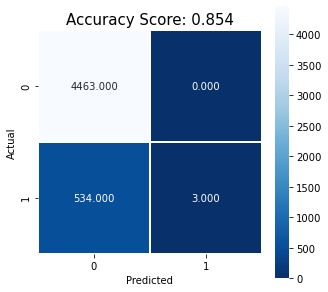

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="0.3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

#### Classification Report

In [94]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, ypred))

              precision    recall  f1-score   support

       False       0.80      0.94      0.87      2500
        True       0.92      0.77      0.84      2500

    accuracy                           0.85      5000
   macro avg       0.86      0.85      0.85      5000
weighted avg       0.86      0.85      0.85      5000



#### ROC Curve

[False  True]
AUC Score: 0.93632064


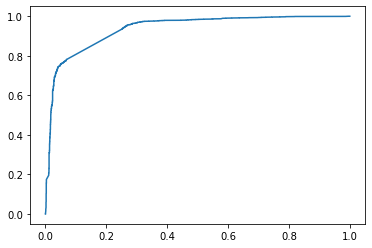

In [95]:
from sklearn.metrics import roc_curve
preds = log_reg.predict_proba(X_test)
print(model.classes_)
fpr, tpr, _ = roc_curve(Y_test, preds[:,1])
plt.plot(fpr, tpr)

auc_score = metrics.roc_auc_score(Y_test, preds[:,1])
print("AUC Score:", auc_score)

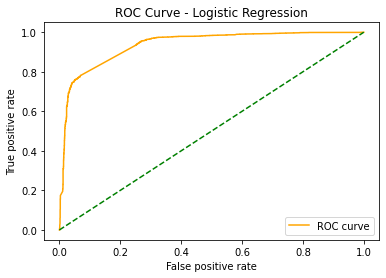

In [96]:
fpr, tpr, _ = roc_curve(Y_test, log_reg.decision_function(X_test))
plt.plot(fpr, tpr, color='orange')
plt.legend(['ROC curve','Logistic Regression'])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('ROC Curve - Logistic Regression')
plt.show()


## Baseline

Classification Report:
               precision    recall  f1-score   support

       False       0.50      1.00      0.67      2500
        True       0.00      0.00      0.00      2500

    accuracy                           0.50      5000
   macro avg       0.25      0.50      0.33      5000
weighted avg       0.25      0.50      0.33      5000

Confusion Matrix:
 [[2500    0]
 [2500    0]]


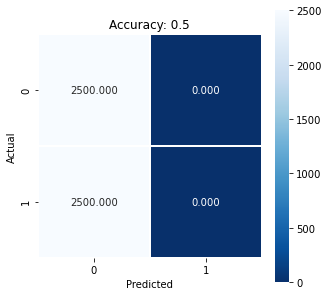

In [102]:
from sklearn import metrics
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy = "most_frequent").fit(X_train, Y_train)
ydummy = dummy.predict(X_test)

print("Classification Report:\n", classification_report(Y_test, ydummy))
dummycm = metrics.confusion_matrix(Y_test, ydummy)
print("Confusion Matrix:\n", dummycm)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
sns.heatmap(dummycm, annot=True, fmt="0.3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual');
plt.xlabel('Predicted')
plt.title("Accuracy: 0.5")
plt.show()

## text + early_access [x + z]

### Logistic Regression

In [121]:
log_reg = LogisticRegression()
model = log_reg.fit(X_train, Z_train)
print("\nIntercept:", model.intercept_)
print("\nCoef:", model.coef_)

xpred = model.predict(X_train)
zpred = model.predict(X_test)

# Use score method to get accuracy of model
score = log_reg.score(X_test, Z_test)
print("\nScore:", score)


Intercept: [-2.22475922]

Coef: [[ 0.21193807 -0.12174736 -0.00300896 ... -0.0021769  -0.01431211
  -0.08992057]]

Score: 0.8932


### Confusion Matrix

In [104]:
from sklearn import metrics
cm = metrics.confusion_matrix(Z_test, zpred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[4463    0]
 [ 534    3]]


#### Confusion Matrix using seaborn

Text(0.5, 1.0, 'Accuracy Score: 0.8932')

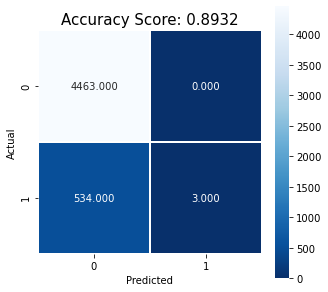

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="0.3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

#### Classification Report

In [113]:
from sklearn.metrics import classification_report
print(classification_report(Z_test, zpred))

              precision    recall  f1-score   support

       False       0.89      1.00      0.94      4463
        True       1.00      0.01      0.01       537

    accuracy                           0.89      5000
   macro avg       0.95      0.50      0.48      5000
weighted avg       0.90      0.89      0.84      5000



#### ROC Curve

[False  True]
AUC Score: 0.9151325339612147


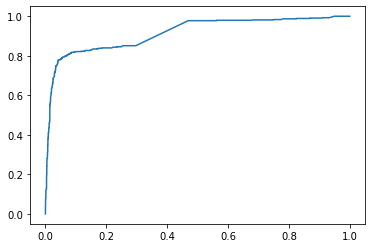

In [108]:
from sklearn.metrics import roc_curve
preds = log_reg.predict_proba(X_test)
print(model.classes_)
fpr, tpr, _ = roc_curve(Z_test, preds[:,1])
plt.plot(fpr, tpr)

auc_score = metrics.roc_auc_score(Z_test, preds[:,1])
print("AUC Score:", auc_score)

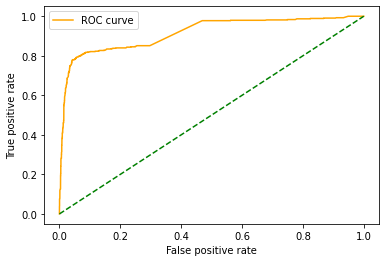

In [124]:
fpr, tpr, _ = roc_curve(Z_test, log_reg.decision_function(X_test))
plt.plot(fpr, tpr, color='orange')
plt.legend(['ROC curve','Logistic Regression'])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.show()

## Baseline

D:\Anaconda1\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

       False       0.89      1.00      0.94      4463
        True       0.00      0.00      0.00       537

    accuracy                           0.89      5000
   macro avg       0.45      0.50      0.47      5000
weighted avg       0.80      0.89      0.84      5000

Confusion Matrix:
 [[4463    0]
 [ 537    0]]


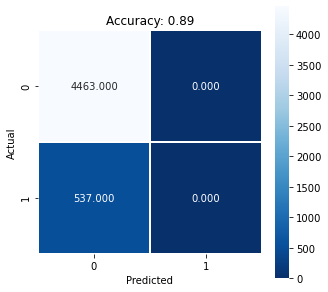

In [125]:
from sklearn import metrics
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy = "most_frequent").fit(X_train, Z_train)
zdummy = dummy.predict(X_test)

print("Classification Report:\n", classification_report(Z_test, zdummy))
dummycm = metrics.confusion_matrix(Z_test, zdummy)
print("Confusion Matrix:\n", dummycm)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
sns.heatmap(dummycm, annot=True, fmt="0.3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Accuracy: 0.89')
plt.show()